# SURUTHI S
# 225229141

In [ ]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 3.9 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,models
from kerastuner.tuners import RandomSearch
import keras
import keras_tuner
from kerastuner.tuners import Hyperband

<ipython-input-4-7ef419865721>:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [ ]:
(x_train,y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
len(x_train),len(x_test)

# 60000 for training
# 10000 for testing

(60000, 10000)

In [ ]:
x_train[2].dtype

dtype('uint8')

In [ ]:
type(x_train[2])

numpy.ndarray

In [ ]:
y_train[2]

4

In [ ]:
import matplotlib.pyplot as plt

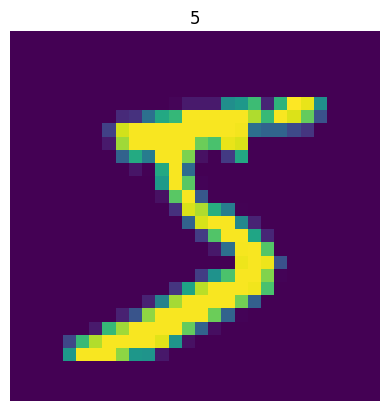

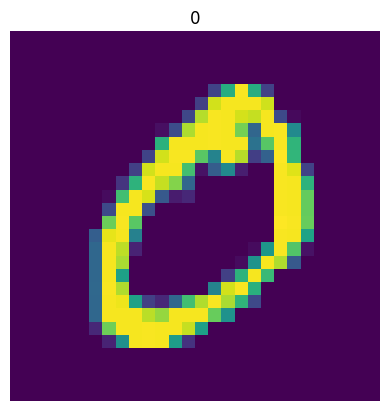

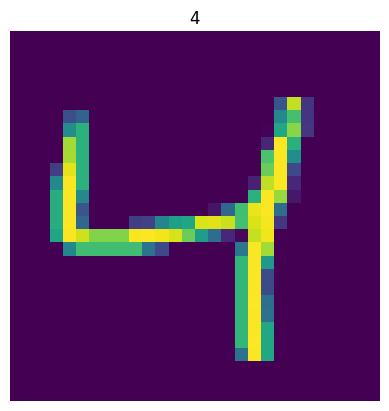

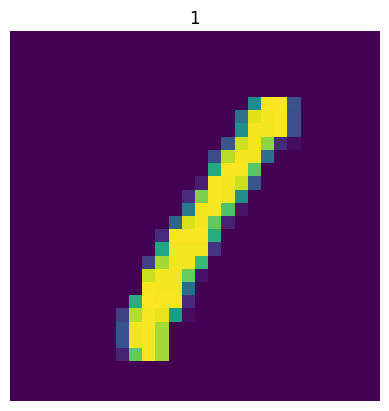

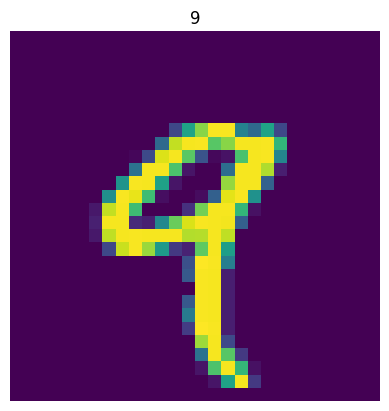

In [ ]:
for i in range(5):
  plt.imshow(x_train[i])
  plt.title(y_train[i])
  plt.axis("off")
  plt.show()

In [ ]:
x_train[1].shape

(28, 28)

# Baseline Model

In [ ]:
model = tf.keras.Sequential()
model.add(layers.Flatten(input_shape=(28,28)))

# defining hyperparameters for number of nodes in hidden layer
model.add(layers.Dense(512,activation = 'relu'))

model.add(layers.Dense(10,activation = 'softmax'))

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history_nodes = model.fit(x_train,y_train,epochs = 10,validation_split = 0.10)

Epoch 1/10
1688/1688 [==============================] - 16s 6ms/step - loss: 2.9446 - accuracy: 0.9004 - val_loss: 0.3943 - val_accuracy: 0.9303
Epoch 2/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3561 - accuracy: 0.9346 - val_loss: 0.3206 - val_accuracy: 0.9490
Epoch 3/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3089 - accuracy: 0.9411 - val_loss: 0.2809 - val_accuracy: 0.9487
Epoch 4/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2823 - accuracy: 0.9441 - val_loss: 0.2718 - val_accuracy: 0.9478
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2569 - accuracy: 0.9478 - val_loss: 0.2259 - val_accuracy: 0.9568
Epoch 6/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2255 - accuracy: 0.9532 - val_loss: 0.2434 - val_accuracy: 0.9555
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2301 - accuracy: 0.9539 - val_loss: 0.2260 - val_accurac

In [ ]:
def accuracy(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title(" Accuracy ")
  plt.xlabel('Epochs')
  plt.ylabel("Accuracy")
  plt.legend(['Train',"Test"])
  plt.show()

def loss_plot(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title(" Loss ")
  plt.ylabel("Loss")
  plt.xlabel("Epochs")
  plt.legend(['Train','Test'],loc='best')
  plt.show()


In [ ]:
a = range(10,100,10)
a

range(10, 100, 10)

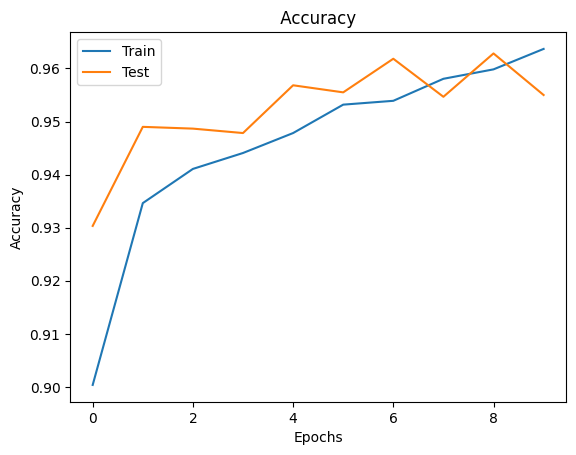

In [ ]:
accuracy(history_nodes)

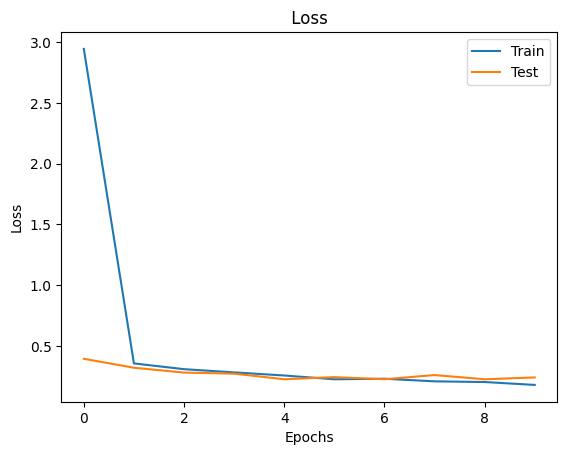

In [ ]:
loss_plot(history_nodes)

# Exploration

In [ ]:
# single hidden layer with 32 nodes
# 10 epochs

In [ ]:
from kerastuner.engine.hyperparameters import HyperParameters

In [ ]:
hp = HyperParameters()
hp.Int('hidden_size',
       min_value = 2,
       max_value = 2056,
       step = 2,
       sampling = 'log')

2

In [ ]:
def build_model(hp):
  model = tf.keras.Sequential()
  model.add(layers.Flatten(input_shape=(28,28)))

  # defining hyperparameters for number of nodes in hidden layer
  model.add(layers.Dense(hp.Int('hidden_size',
                                min_value = 2,
                                max_value = 2056,
                                step = 2,
                                sampling = 'log'),
                         activation = 'relu'))

  model.add(layers.Dense(10,activation = 'softmax'))

  model.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])
  return model

In [ ]:
tuner = RandomSearch(
    build_model,
    objective = 'val_accuracy',
    max_trials = 5
)

In [ ]:
tuner.search(x_train,y_train,epochs = 10,validation_split = 0.10)

Trial 5 Complete [00h 00m 57s]
val_accuracy: 0.8678333163261414

Best val_accuracy So Far: 0.9608333110809326
Total elapsed time: 00h 05m 33s


# 2.NUMBER OF LAYERS

In [ ]:
hp_layer = HyperParameters()

In [ ]:
def build_model2(hp_layer):
  model_layers = tf.keras.Sequential()
  model_layers.add(layers.Flatten(input_shape=(28,28)))

  # defining hyperparameters for number of  hidden layers
  for i in range(hp_layer.Int('num_layers',
                         min_value = 2,
                         max_value = 16,
                         step = 2)):
    model_layers.add(keras.layers.Dense(32,activation = 'relu'))


  model_layers.add(layers.Dense(10,activation = 'softmax'))

  model_layers.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])
  return model_layers

In [ ]:
tuner_2 = Hyperband(
    build_model2,
    objective='val_accuracy',
    factor=3,
    overwrite=True)

In [ ]:
tuner_2.search(x_train,y_train,epochs = 10,validation_split = 0.10)

Trial 8 Complete [00h 00m 22s]
val_accuracy: 0.9474999904632568

Best val_accuracy So Far: 0.953166663646698
Total elapsed time: 00h 03m 37s


In [ ]:
best_hps = tuner_2.get_best_hyperparameters(num_trials=1)[0]
model2 = tuner_2.hypermodel.build(best_hps)

In [ ]:
model2

In [ ]:
tuner_results_layers = tuner_2.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0002 summary
Hyperparameters:
num_layers: 8
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.953166663646698

Trial 0001 summary
Hyperparameters:
num_layers: 14
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.9505000114440918

Trial 0007 summary
Hyperparameters:
num_layers: 6
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.9474999904632568

Trial 0004 summary
Hyperparameters:
num_layers: 12
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.9451666474342346

Trial 0000 summary
Hyperparameters:
num_layers: 16
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.9448333382606506

Trial 0006 summary
Hyperparameters:
num_layers: 10
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.943333327

# Activation Function

In [ ]:
def build_model_act(act):
  model_act = tf.keras.Sequential()
  model_act.add(layers.Flatten(input_shape=(28,28)))

  model_act.add(keras.layers.Dense(32,activation = act.Choice("activation",
                                                    ['relu','tanh','sigmoid'])))
  model_act.add(keras.layers.Dense(32,activation = act.Choice("activation",
                                                    ['relu','tanh','sigmoid'])))
  model_act.add(keras.layers.Dense(32,activation = act.Choice("activation",
                                                    ['relu','tanh','sigmoid'])))


  model_act.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])
  return model_act

In [ ]:
build_model_act(keras_tuner.HyperParameters())

In [ ]:
tuner_3 = Hyperband(
    build_model_act,
    objective='val_accuracy',
    overwrite=True)

In [ ]:
tuner_3.search(x_train,y_train,epochs = 10,validation_split = 0.10)

Trial 3 Complete [00h 00m 21s]
val_accuracy: 0.19699999690055847

Best val_accuracy So Far: 0.8666666746139526
Total elapsed time: 00h 00m 57s


In [ ]:
best_hps = tuner_3.get_best_hyperparameters(num_trials=1)[0]
model_3 = tuner_3.hypermodel.build(best_hps)

In [ ]:
tuner_results_act = tuner_3.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0001 summary
Hyperparameters:
activation: sigmoid
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.8666666746139526

Trial 0000 summary
Hyperparameters:
activation: tanh
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.6621666550636292

Trial 0002 summary
Hyperparameters:
activation: relu
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.19699999690055847


# Activation Function Combination

In [ ]:
model_act_2 = tf.keras.Sequential()
model_act_2.add(layers.Flatten(input_shape=(28,28)))

model_act_2.add(keras.layers.Dense(32,activation = 'sigmoid'))
model_act_2.add(keras.layers.Dense(32,activation = 'relu'))
model_act_2.add(keras.layers.Dense(32,activation = 'tanh'))



model_act_2.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])


In [ ]:
history_act_2 = model_act_2.fit(x_train,y_train,epochs = 10,validation_split = 0.10)

Epoch 1/10
1688/1688 [==============================] - 8s 4ms/step - loss: 3.3701 - accuracy: 0.1750 - val_loss: 3.4670 - val_accuracy: 0.0488
Epoch 2/10
1688/1688 [==============================] - 6s 4ms/step - loss: 3.4653 - accuracy: 0.0512 - val_loss: 3.4670 - val_accuracy: 0.0488
Epoch 3/10
1688/1688 [==============================] - 9s 5ms/step - loss: 3.4653 - accuracy: 0.0507 - val_loss: 3.4670 - val_accuracy: 0.0478
Epoch 4/10
1688/1688 [==============================] - 7s 4ms/step - loss: 3.4654 - accuracy: 0.0505 - val_loss: 3.4670 - val_accuracy: 0.0478
Epoch 5/10
1688/1688 [==============================] - 10s 6ms/step - loss: 3.4654 - accuracy: 0.0505 - val_loss: 3.4670 - val_accuracy: 0.0478
Epoch 6/10
1688/1688 [==============================] - 9s 5ms/step - loss: 3.4654 - accuracy: 0.0511 - val_loss: 3.4670 - val_accuracy: 0.0533
Epoch 7/10
1688/1688 [==============================] - 8s 5ms/step - loss: 3.4654 - accuracy: 0.0570 - val_loss: 3.4670 - val_accuracy

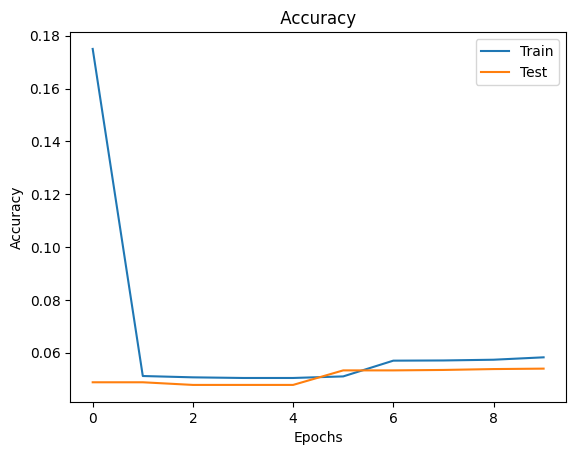

In [ ]:
accuracy(history_act_2)

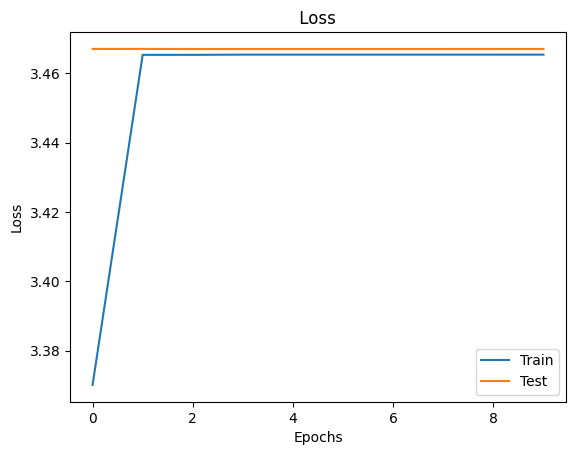

In [ ]:
loss_plot(history_act_2)

**As we can clearly see the combinations of using sigmoid in layer 1  reluin layer 2 and tan hyperbolic in layer 3 is not at all giving the best accurate model it doesnt tried to capture the basic pattern in the data**

**it seems it may not be the  optimal one for training**

In [ ]:
def build_model_act_layer(act_layer):
  model_layers_act = tf.keras.Sequential()
  model_layers_act.add(layers.Flatten(input_shape=(28,28)))

  # defining hyperparameters for number of  hidden layers
  for i in range(act_layer.Int('num_layers',
                         min_value = 2,
                         max_value = 16,
                         step = 2)):
    model_layers_act.add(keras.layers.Dense(32,activation = act_layer.Choice("activation",['relu','tanh','sigmoid'])))


  model_layers_act.add(layers.Dense(10,activation = 'softmax'))

  model_layers_act.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])
  return model_layers_act

In [ ]:
build_model_act_layer(keras_tuner.HyperParameters())

In [ ]:
tuner_4 = Hyperband(
    build_model_act_layer,
    objective='val_accuracy',
    overwrite=True)

In [ ]:
tuner_4.search(x_train,y_train,epochs = 10,validation_split = 0.10)

Trial 24 Complete [00h 00m 16s]
val_accuracy: 0.9375

Best val_accuracy So Far: 0.9578333497047424
Total elapsed time: 00h 10m 51s


In [ ]:
best_hps_4 = tuner_4.get_best_hyperparameters(num_trials=1)[0]
model_4 = tuner_4.hypermodel.build(best_hps_4)

In [ ]:
tuner_results_act = tuner_4.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0019 summary
Hyperparameters:
num_layers: 14
activation: relu
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.9578333497047424

Trial 0021 summary
Hyperparameters:
num_layers: 10
activation: relu
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.9546666741371155

Trial 0010 summary
Hyperparameters:
num_layers: 12
activation: relu
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.9518333077430725

Trial 0002 summary
Hyperparameters:
num_layers: 8
activation: relu
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.9449999928474426

Trial 0023 summary
Hyperparameters:
num_layers: 4
activation: relu
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.9375

Trial 0009 summary
Hyperparameters:
num_layers: 6
activation: relu

# Optimizer


In [ ]:
def build_model_optimizer(opt):
  model_layers_opt = tf.keras.Sequential()
  model_layers_opt.add(layers.Flatten(input_shape=(28,28)))

  # defining hyperparameters for number of  hidden layers
  model_layers_opt.add(keras.layers.Dense(32,activation = 'relu'))
  model_layers_opt.add(keras.layers.Dense(32,activation = 'relu'))
  model_layers_opt.add(keras.layers.Dense(32,activation = 'relu'))

  model_layers_opt.add(layers.Dense(10,activation = 'softmax'))

  model_layers_opt.compile(optimizer = opt.Choice('optimizer',['sgd','RMSprop','adam']),
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])
  return model_layers_opt

In [ ]:
build_model_optimizer(keras_tuner.HyperParameters())

In [ ]:
tuner_6 = Hyperband(
    build_model_optimizer,
    objective='val_accuracy',
    overwrite=True)

In [ ]:
tuner_6.search(x_train,y_train,epochs = 10,validation_split = 0.10)

Trial 3 Complete [00h 00m 21s]
val_accuracy: 0.934499979019165

Best val_accuracy So Far: 0.934499979019165
Total elapsed time: 00h 00m 58s


In [ ]:
best_hps_6 = tuner_6.get_best_hyperparameters(num_trials=1)[0]
model_6 = tuner_6.hypermodel.build(best_hps_6)

In [ ]:
tuner_results_opt = tuner_6.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0002 summary
Hyperparameters:
optimizer: RMSprop
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.934499979019165

Trial 0000 summary
Hyperparameters:
optimizer: adam
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.9108333587646484

Trial 0001 summary
Hyperparameters:
optimizer: sgd
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.10499999672174454


# L1,L2 Regularization

In [ ]:
from keras.regularizers import l1,l2

# L2 REGULARIZATION

In [ ]:
def build_model_reg(reg):
  model_layers_reg = tf.keras.Sequential()
  model_layers_reg.add(layers.Flatten(input_shape=(28,28)))

  # defining hyperparameters for number of  hidden layers
  model_layers_reg.add(keras.layers.Dense(32,activation = 'relu',
                                          kernel_regularizer=l2(reg.Choice(
                                              'penalty',[0.01,0.001,0.1,0.05,0.005]
                                          ))))
  model_layers_reg.add(keras.layers.Dense(32,activation = 'relu',
                                          kernel_regularizer=l2(reg.Choice(
                                              'penalty',[0.01,0.001,0.1,0.05,0.005]
                                          ))))
  model_layers_reg.add(keras.layers.Dense(32,activation = 'relu',
                                          kernel_regularizer=l2(reg.Choice(
                                              'penalty',[0.01,0.001,0.1,0.05,0.005]
                                          ))))

  model_layers_reg.add(layers.Dense(10,activation = 'softmax'))

  model_layers_reg.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])
  return model_layers_reg

In [ ]:
build_model_reg(keras_tuner.HyperParameters())

In [ ]:
tuner_7 = Hyperband(
    build_model_reg,
    objective='val_accuracy',
    overwrite=True)


In [ ]:
tuner_7.search(x_train,y_train,epochs = 10,validation_split = 0.10)

Trial 5 Complete [00h 00m 18s]
val_accuracy: 0.9256666898727417

Best val_accuracy So Far: 0.9458333253860474
Total elapsed time: 00h 01m 37s


In [ ]:
best_hps_7 = tuner_7.get_best_hyperparameters(num_trials=1)[0]
model_7 = tuner_7.hypermodel.build(best_hps_7)

In [ ]:
tuner_results_act = tuner_7.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0002 summary
Hyperparameters:
penalty: 0.05
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.9458333253860474

Trial 0001 summary
Hyperparameters:
penalty: 0.1
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.934333324432373

Trial 0004 summary
Hyperparameters:
penalty: 0.01
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.9256666898727417

Trial 0000 summary
Hyperparameters:
penalty: 0.005
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.9116666913032532

Trial 0003 summary
Hyperparameters:
penalty: 0.001
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.9006666541099548


# L1 REGULARIZATION

In [ ]:
def build_model_reg_l1(reg_l1):
  model_layers_reg_l1 = tf.keras.Sequential()
  model_layers_reg_l1.add(layers.Flatten(input_shape=(28,28)))

  # defining hyperparameters for number of  hidden layers
  model_layers_reg_l1.add(keras.layers.Dense(32,activation = 'relu',
                                          kernel_regularizer=l1(reg_l1.Choice(
                                              'penalty',[0.01,0.001,0.1,0.05,0.005]
                                          ))))
  model_layers_reg_l1.add(keras.layers.Dense(32,activation = 'relu',
                                          kernel_regularizer=l1(reg_l1.Choice(
                                              'penalty',[0.01,0.001,0.1,0.05,0.005]
                                          ))))
  model_layers_reg_l1.add(keras.layers.Dense(32,activation = 'relu',
                                          kernel_regularizer=l1(reg_l1.Choice(
                                              'penalty',[0.01,0.001,0.1,0.05,0.005]
                                          ))))

  model_layers_reg_l1.add(layers.Dense(10,activation = 'softmax'))

  model_layers_reg_l1.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])
  return build_model_reg_l1

In [ ]:
build_model_reg_l1(keras_tuner.HyperParameters())

<function __main__.build_model_reg_l1(reg_l1)>

In [ ]:
tuner_7_L1 = Hyperband(
    build_model_act_layer,
    objective='val_accuracy',
    overwrite=True)

In [ ]:
tuner_7_L1.search(x_train,y_train,epochs = 10,validation_split = 0.10)

Trial 24 Complete [00h 00m 27s]
val_accuracy: 0.9483333230018616

Best val_accuracy So Far: 0.9576666951179504
Total elapsed time: 00h 10m 55s


In [ ]:
best_hps_7_L1= tuner_7_L1.get_best_hyperparameters(num_trials=1)[0]
model_7_L1 = tuner_7_L1.hypermodel.build(best_hps_7_L1)

In [ ]:
tuner_results_7_L1 = tuner_7_L1.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0003 summary
Hyperparameters:
num_layers: 10
activation: relu
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.9576666951179504

Trial 0010 summary
Hyperparameters:
num_layers: 12
activation: relu
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.9538333415985107

Trial 0020 summary
Hyperparameters:
num_layers: 8
activation: relu
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.9484999775886536

Trial 0023 summary
Hyperparameters:
num_layers: 14
activation: relu
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.9483333230018616

Trial 0016 summary
Hyperparameters:
num_layers: 16
activation: relu
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.9426666498184204

Trial 0005 summary
Hyperparameters:
num_layers: 4
act

# Dropout Regularization

In [ ]:
def build_model_drop(drop):
  model_layers_drop = tf.keras.Sequential()
  model_layers_drop.add(layers.Flatten(input_shape=(28,28)))
  for i in range(drop.Int('num_layers', 1, 4)):
        model_layers_drop.add(layers.Dense(128,activation='relu'))
        model_layers_drop.add(layers.Dropout(rate=drop.Float('dropout_' + str(i), 0.2, 0.5, 0.1)))

  model_layers_drop.add(layers.Dense(10,activation = 'softmax'))

  model_layers_drop.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])
  return model_layers_drop

In [ ]:
build_model_drop(keras_tuner.HyperParameters())

In [ ]:
tuner_8 = Hyperband(
    build_model_drop,
    objective='val_accuracy',
    overwrite=True)


In [ ]:
tuner_8.search(x_train,y_train,epochs = 10,validation_split = 0.10)

In [ ]:
best_hps_8 = tuner_8.get_best_hyperparameters(num_trials=1)[0]
model_8 = tuner_8.hypermodel.build(best_hps_8)

In [ ]:
tuner_results_drop = tuner_8.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0036 summary
Hyperparameters:
num_layers: 3
dropout_0: 0.2
dropout_1: 0.2
dropout_2: 0.4
dropout_3: 0.2
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.9308333396911621

Trial 0061 summary
Hyperparameters:
num_layers: 3
dropout_0: 0.30000000000000004
dropout_1: 0.2
dropout_2: 0.30000000000000004
dropout_3: 0.2
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.9308333396911621

Trial 0021 summary
Hyperparameters:
num_layers: 3
dropout_0: 0.30000000000000004
dropout_1: 0.2
dropout_2: 0.2
dropout_3: 0.30000000000000004
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.9296666383743286

Trial 0041 summary
Hyperparameters:
num_layers: 1
dropout_0: 0.2
dropout_1: 0.30000000000000004
dropout_2: 0.30000000000000004
dropout_3: 0.4
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket

In [ ]:
import cv2

In [ ]:
def resize(x,size):
     for img in x:
            resized_img = cv2.resize(img, (size, size))
     return resized_img

In [ ]:
x_train = resize(x_train,56)
x_test = resize(x_test,56)

In [ ]:
model_layers_resize_56 = tf.keras.Sequential()
model_layers_resize_56.add(layers.Flatten(input_shape=(56,56)))

# defining hyperparameters for number of  hidden layers
model_layers_resize_56.add(keras.layers.Dense(128,activation = 'relu'))
model_layers_resize_56.add(keras.layers.Dense(128,activation = 'relu'))
model_layers_resize_56.add(keras.layers.Dense(128,activation = 'relu'))

model_layers_resize_56.add(layers.Dense(10,activation = 'softmax'))

model_layers_resize_56.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# DataSet split

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))

test_size = 0.30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)

In [ ]:
len(x_train),len(x_test)

(49000, 21000)

In [ ]:
model_10 = tf.keras.Sequential()
model_10.add(layers.Flatten(input_shape=(28,28)))

model_10.add(layers.Dense(512,activation = 'relu'))

model_10.add(layers.Dense(10,activation = 'softmax'))

model_10.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history_10 = model_10.fit(x_train,y_train,epochs = 10,validation_split = 0.10)

Epoch 1/10
1379/1379 [==============================] - 6s 3ms/step - loss: 3.4034 - accuracy: 0.9007 - val_loss: 0.8432 - val_accuracy: 0.9141
Epoch 2/10
1379/1379 [==============================] - 8s 6ms/step - loss: 0.3919 - accuracy: 0.9384 - val_loss: 0.4661 - val_accuracy: 0.9255
Epoch 3/10
1379/1379 [==============================] - 8s 6ms/step - loss: 0.2988 - accuracy: 0.9441 - val_loss: 0.4609 - val_accuracy: 0.9365
Epoch 4/10
1379/1379 [==============================] - 7s 5ms/step - loss: 0.3298 - accuracy: 0.9450 - val_loss: 0.4349 - val_accuracy: 0.9400
Epoch 5/10
1379/1379 [==============================] - 5s 4ms/step - loss: 0.3113 - accuracy: 0.9473 - val_loss: 0.4509 - val_accuracy: 0.9404
Epoch 6/10
1379/1379 [==============================] - 4s 3ms/step - loss: 0.2553 - accuracy: 0.9530 - val_loss: 0.4324 - val_accuracy: 0.9431
Epoch 7/10
1379/1379 [==============================] - 4s 3ms/step - loss: 0.2403 - accuracy: 0.9546 - val_loss: 0.5079 - val_accuracy:

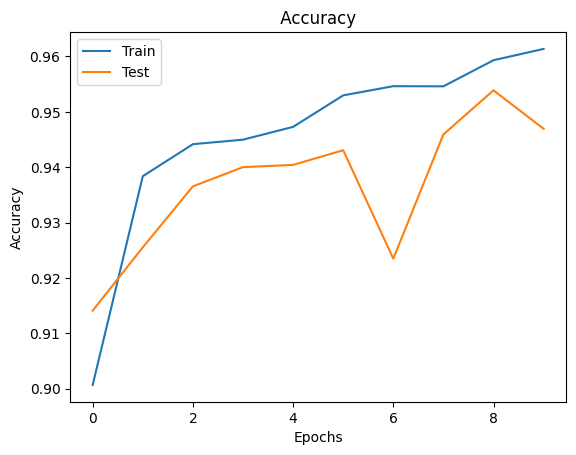

In [ ]:
accuracy(history_10)

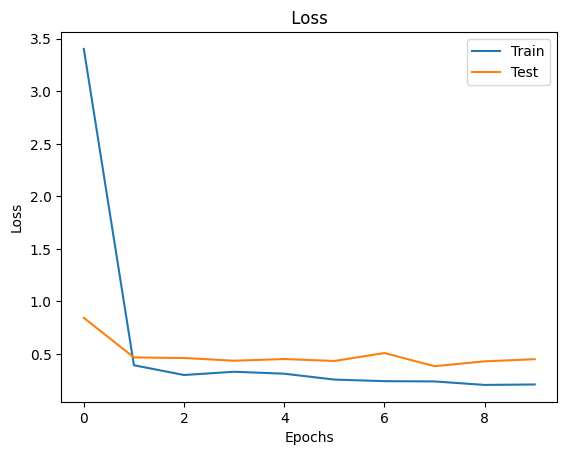

In [ ]:
loss_plot(history_10)